# CAPSTONE: Wine Not?
By: Molly Foote

Add a description here of the project

## Hypothesis
The rating of a wine is dependent on the listed price as well as the description given on Wine Enthusiast's website.

## I. Load and Prep Data

### A. Data Source

Link to original source:https://www.kaggle.com/zynicide/wine-reviews/data?select=winemag-data_first150k.csv

**Website Description**

**Acknowledgements**
The data was scraped from WineEnthusiast during the week of June 15th, 2017. The code for the scraper can be found here if you have any more specific questions about data collection that I didn't address.

**UPDATE 11/24/2017**
After feedback from users of the dataset I scraped the reviews again on November 22nd, 2017. This time around I collected the title of each review, which you can parse the year out of, the tasters name, and the taster's Twitter handle. This should also fix the duplicate entry issue.

### B. Import Libraries

In [1]:
#Import all the libaries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd
import re

### C. Import Dataframes
* Wine data from Kaggle
* List of buzzwords, set as string

In [2]:
#Load CSV files
wine =  pd.read_csv(r'C:\Users\mmf06\OneDrive\Springboard - Data Analytics\Capstone 2 - TBD\winemag-data_first150k.csv', header=0)
words = pd.read_csv(r'C:\Users\mmf06\OneDrive\Springboard - Data Analytics\Capstone 2 - TBD\word_list.csv', header=0)

#Drop Unnamed column - it is the same as the index
wine = wine.drop(['Unnamed: 0'], axis = 1)

#make sure that all elements in lists are strings
word_lists = words.applymap(str)



### D. Select Wine Styles that have over 500 entries in Original Dataset
* categorize variety as either Red or White wine, add as new column
* assign coded number to each value, add as new column
* count total red and white wines
* drop wines with less than 500 entries

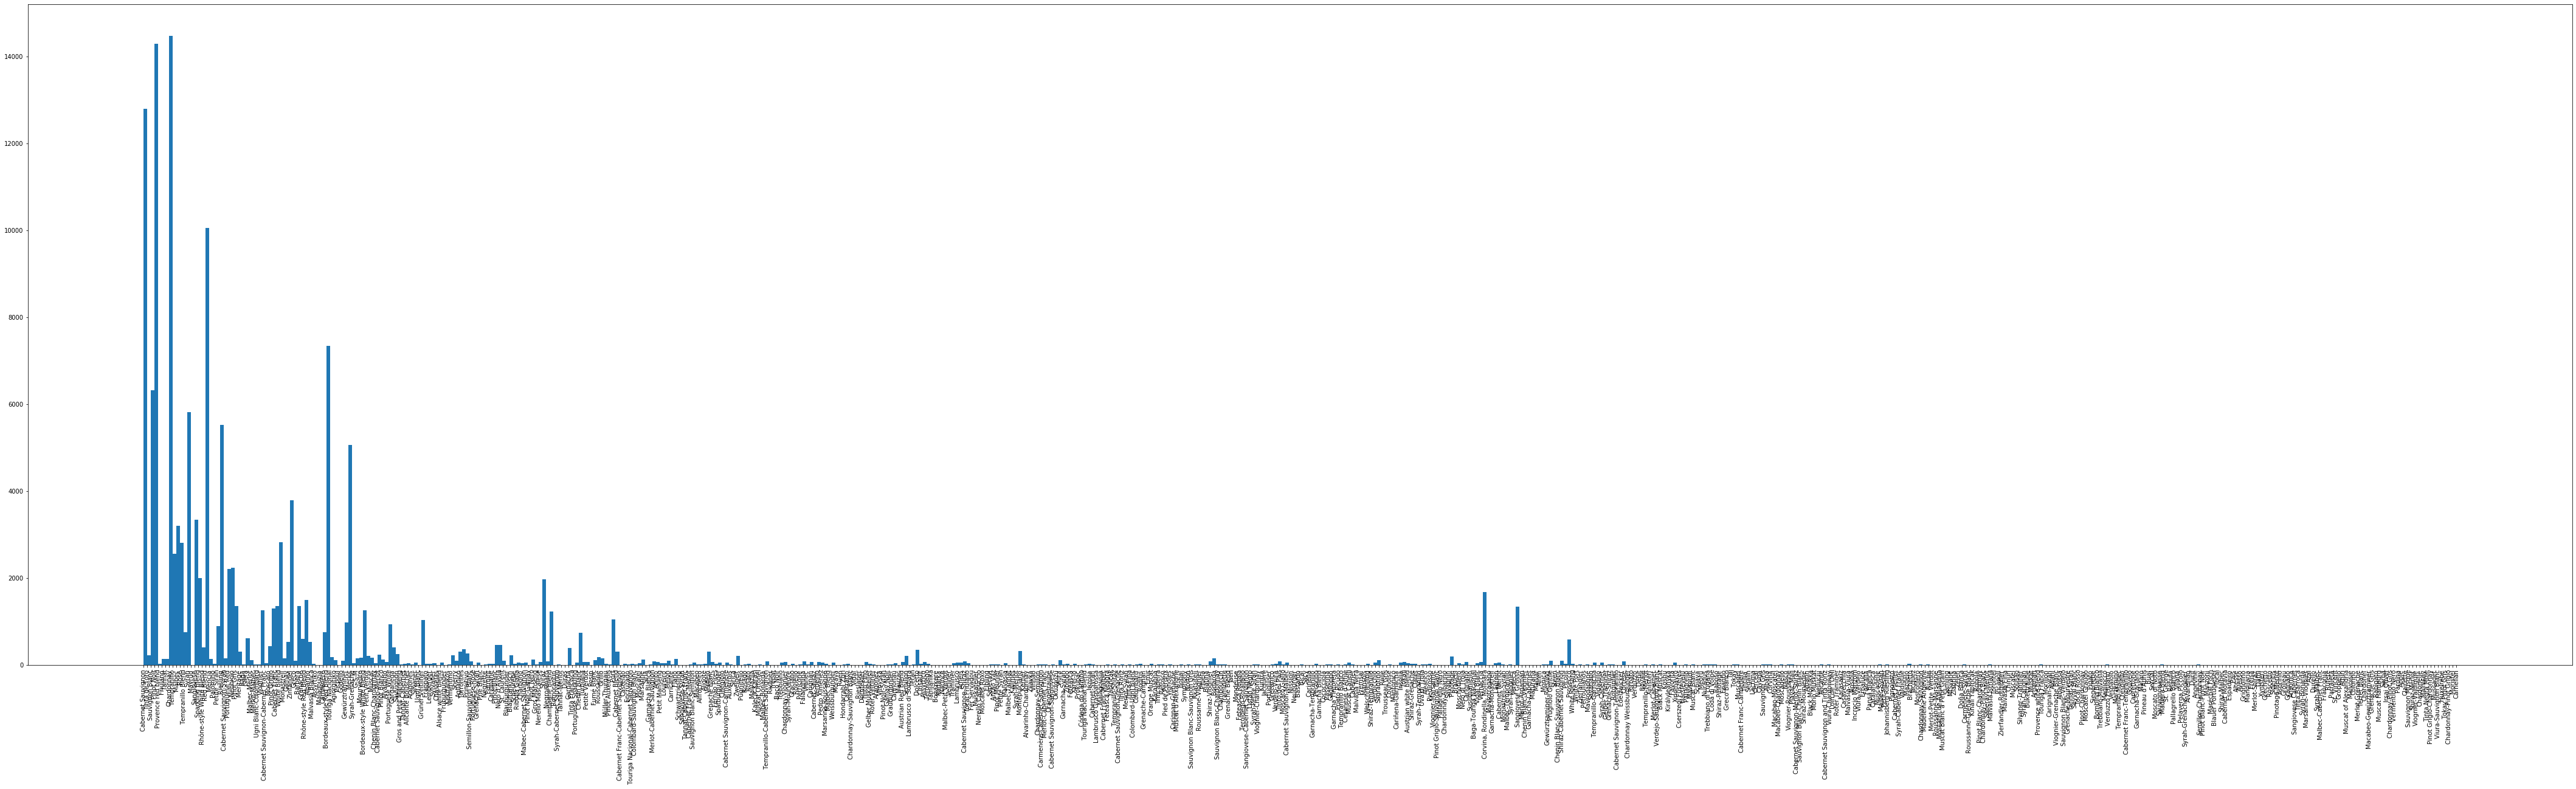

In [46]:
fig, axes = plt.subplots(figsize=[75, 20])
plt.hist(wine['variety'], bins=632)
plt.xticks(rotation=90)
plt.show()

country        132464
description    132468
designation     92344
points         132468
price          120341
province       132464
region_1       111137
region_2        57431
variety        132468
winery         132468
dtype: int64


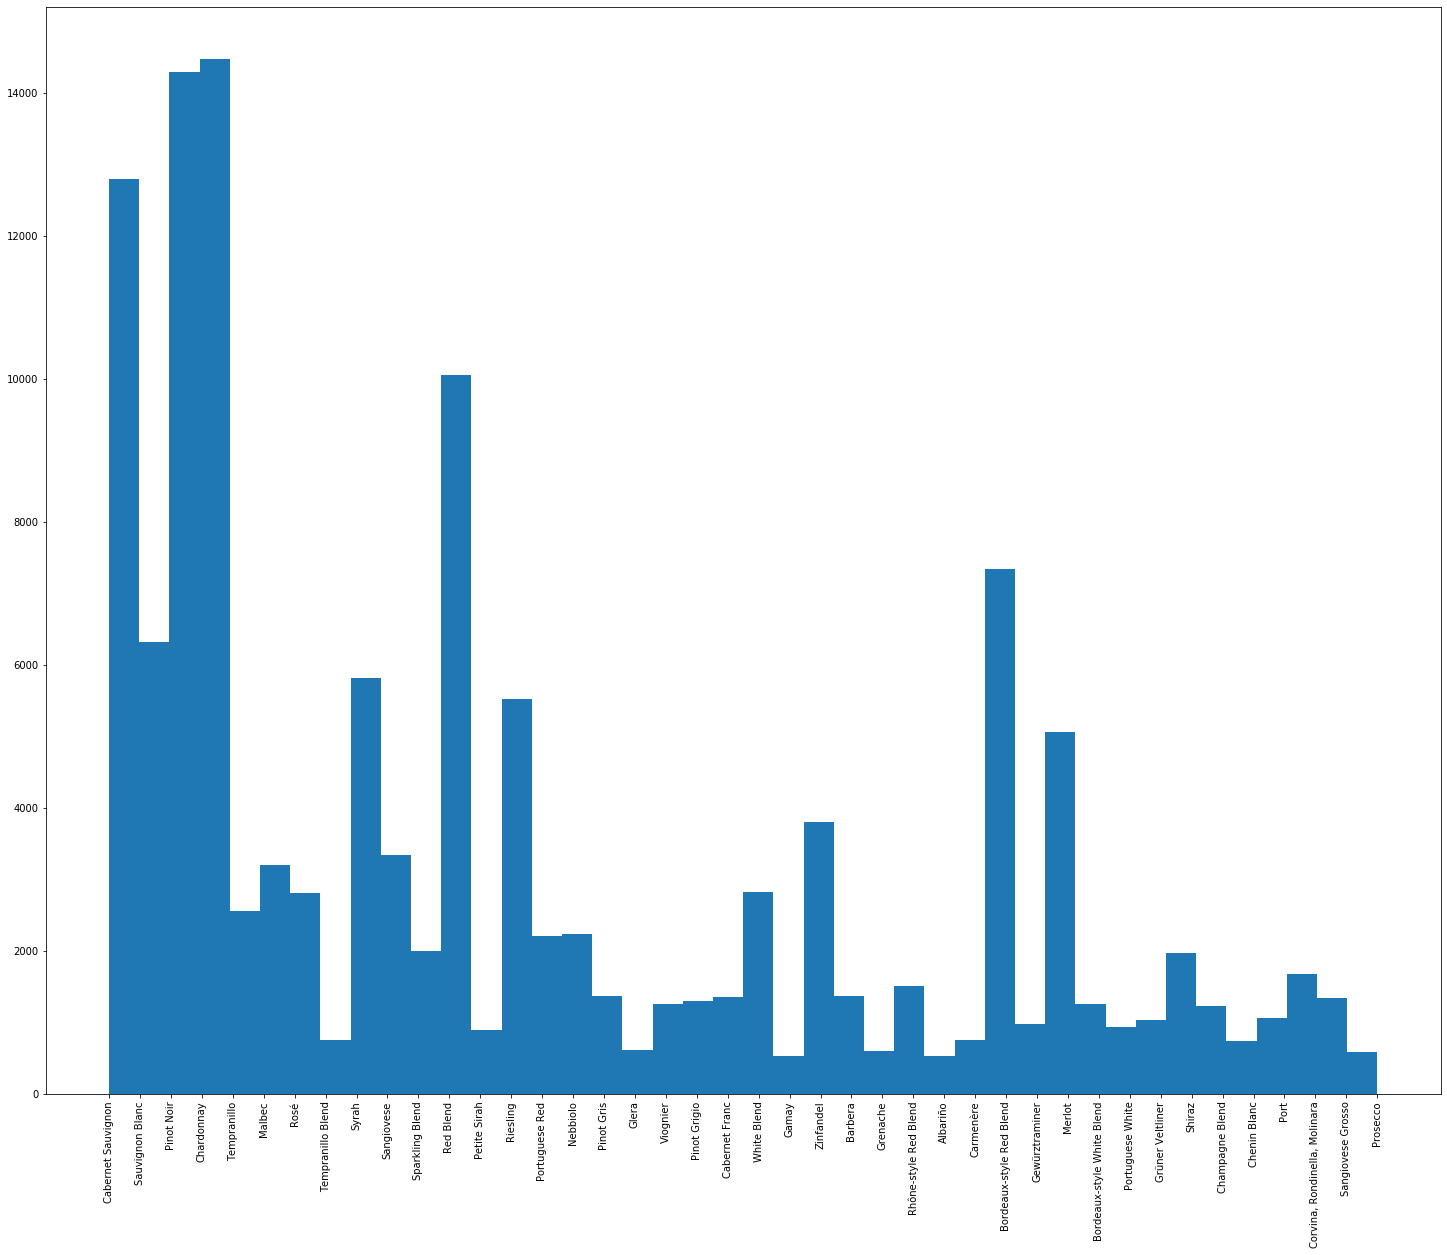

In [47]:
#select wine varieties that have 500+ entries in dataframe
df_var_filt = wine.loc[wine['variety'].isin(['Chardonnay' , 'Pinot Noir', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend', 'Sauvignon Blanc', 'Syrah', 'Riesling', 'Merlot', 'Zinfandel', 'Sangiovese', 'Malbec', 'White Blend', 'Rosé', 'Tempranillo', 'Nebbiolo', 'Portuguese Red', 'Sparkling Blend', 'Shiraz', 'Corvina, Rondinella, Molinara', 'Rhône-style Red Blend', 'Pinot Gris', 'Barbera', 'Cabernet Franc', 'Sangiovese Grosso', 'Pinot Grigio', 'Viognier', 'Bordeaux-style White Blend', 'Champagne Blend', 'Port', 'Grüner Veltliner', 'Gewürztraminer', 'Portuguese White', 'Petite Sirah', 'Carmenère', 'Tempranillo Blend', 'Chenin Blanc', 'Glera', 'Grenache', 'Prosecco', 'Gamay', 'Albariño'])]
print(df_var_filt.count())
fig, axes = plt.subplots(figsize=[25, 20])
plt.hist(df_var_filt['variety'], bins=42)
plt.xticks(rotation=90)
plt.show()

In [48]:
#set df_var_filt as wine
wine = df_var_filt
print(wine.count())

country        132464
description    132468
designation     92344
points         132468
price          120341
province       132464
region_1       111137
region_2        57431
variety        132468
winery         132468
dtype: int64


### E. Prep the wine description for analysis
* change to lower case
* remove punctuations
* split into individual words

In [49]:
#make description lower case
descript = wine['description']
wine['description'] = descript.str.lower()
#print(wine.head())

#remove punctions from description
wine['split_description'] = wine['description'].str.replace(r'[^\w\s]+', '')
#print(wine.head())

#split description string

wine['split_description'] = wine['split_description'].str.split(" ")
#print(wine.head())

### F. Count Buzzwords
* Assign word_lists columns to individual lists for counting different types of words
* Drop any NaN values
* Count the number of winemaking, experience, and flavor words in each row and assign value to column
* Count the total number of buzz words used

In [50]:
#count words that describe wine making process
winemaking = word_lists['winemaking_words']
winemaking = winemaking.dropna()

#count words that describe experience
excellence = word_lists['excellence_words']
excellence = excellence.dropna()

#count words that describe flavor
taste = word_lists['taste_words']
taste = taste.dropna()

#create new dataframes for word count columns
winemaking_word_count = []
excellence_word_count = []
taste_word_count = []
buzz_word_count = []

#iteration for loop to count words in descriptions
for row in wine['split_description']:
    row_winemaking_count = 0
    row_excellence_count = 0
    row_taste_count = 0
    row_buzz = 0
    
    for word in winemaking:
        winemaking_count = row.count(word)
        row_winemaking_count = row_winemaking_count + winemaking_count
    winemaking_word_count.append(row_winemaking_count)
    
    for word in excellence:
        excellence_count = row.count(word)
        row_excellence_count = row_excellence_count + excellence_count
    excellence_word_count.append(row_excellence_count)
    
    for word in taste:
        taste_count = row.count(word)
        row_taste_count = row_taste_count + taste_count
    taste_word_count.append(row_taste_count)
    
    row_buzz = row_winemaking_count + row_excellence_count + row_taste_count
    buzz_word_count.append(row_buzz)
    
#assign values to new columns    
wine['Winemaking_Word_Count'] = winemaking_word_count
wine['Excellence_Word_Count'] = excellence_word_count
wine['Taste_Word_Count'] = taste_word_count
wine['Total_Buzz_Words'] = buzz_word_count

#print (wine.head())

### G. Count Total Number of Words in Descrption

In [51]:
#count the total number of words in the description

total_word_count = []

for row in wine['split_description']:
    
    row_count = 0
    
    for word in row:
        row_count = row_count + 1
    
    total_word_count.append(row_count)

wine['Total_Word_Count'] = total_word_count

#print (wine.head())

### H. Group Wines by Cost
* 00 - 19   
* 20 - 39  
* 40 - 59  
* 60 - 79
* 80+      

In [52]:
#group by price

price_group_col = []
price_name_col = []

for row in wine['price']:
    
    if row > 79 :
        price_group = 5
        price_name = "$$$$$"
    elif row > 59:
        price_group = 4
        price_name = "$$$$"
    elif row > 39 :
        price_group = 3
        price_name = "$$$"
    elif row > 19 :
        price_group = 2
        price_name = "$$"
    else:
        price_group = 1 
        price_name = "$"
    
    price_group_col.append(price_group)
    price_name_col.append(price_name)
    
wine['Price_Group'] = price_group_col
wine['Price_Group_Name'] = price_name_col

#print(wine.head())

### I. Group by Wine Rankings

In [53]:
#Group by point system

pt_group_col = []
pt_name_col = []

for row in wine['points']:
    
    if row > 97 :
        pt_group = 5
        pt_name = "Classic (>98)"
    elif row > 93:
        pt_group = 4
        pt_name = "Superb (94-97)"
    elif row > 89 :
        pt_group = 3
        pt_name = "Excellent (90-93)"
    elif row > 86 :
        pt_group = 2
        pt_name = "Very Good (87-89)"
    elif row > 82 :
        pt_group = 1 
        pt_name = "Good (83-86)"
    else:
        pt_group = 0
        pt_name = "Acceptable"
    
    pt_group_col.append(pt_group)
    pt_name_col.append(pt_name)
    
wine['Point_Group'] = pt_group_col
wine['Point_Group_Name'] = pt_name_col

#print(wine.head())

#Export to CSV file for visualization in tableau
wine.to_csv(r'C:\Users\mmf06\OneDrive\Springboard - Data Analytics\Capstone 2 - TBD\Wine_Not_Dataframe_NoRedWhite.csv')

## II. ANALYSIS
Using descriptive and inferential statistics to explore dataframe.

A. Distribution of Wine Ratings and Prices

B. Distribution of Wine Ratings and Prices by Group

C. Distribution of Wine Description Length

D. Distribution of Wine Description Usage of Buzz Words

E. Descriptive Statistics Summary Table

F. Calculate Variable Quartiles

G. All Wines - Outlier Identification by IQR

H. Outlier Removal

I. Inferential Statistics - Pearson Coefficient Matrix

J. OLS Regression to Predict Wine Points Value

K. Word Clouds

### A. Distribution of Wine Ratings

C:\Users\mmf06\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mmf06\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


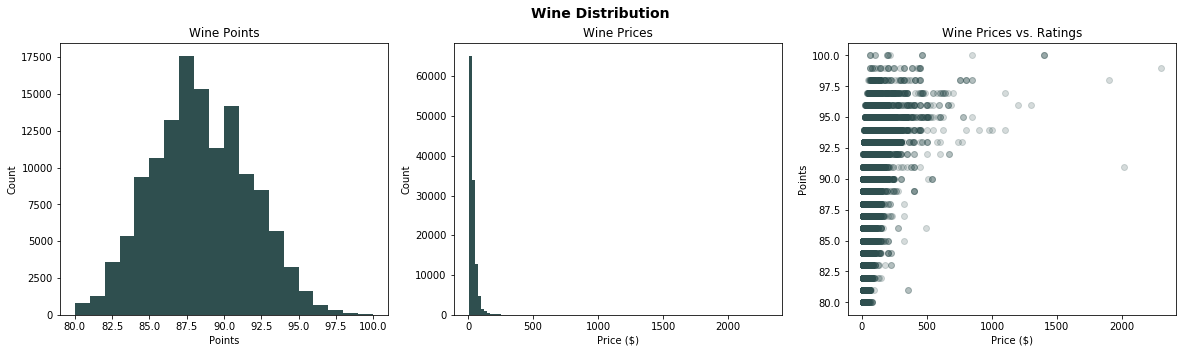

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[20, 5])
ax0, ax1, ax2 = axes.flatten()
fig.suptitle('Wine Distribution', fontsize=14, fontweight='bold')
ax0.hist(wine['points'], bins=20, color='darkslategrey')
ax0.set_title('Wine Points')
ax0.set_ylabel('Count')
ax0.set_xlabel('Points')
ax1.hist(wine['price'], bins=100, color='darkslategrey')
ax1.set_title('Wine Prices')
ax1.set_ylabel('Count')
ax1.set_xlabel('Price ($)')
ax2.scatter(wine['price'], wine['points'], marker='o', alpha = 0.2, color='darkslategrey')
ax2.set_ylabel('Points')
ax2.set_xlabel('Price ($)')
ax2.set_title('Wine Prices vs. Ratings')
plt.savefig('price_point_distributions.png')
plt.show()

### B. Distribution of Wine Prices and Points by Group


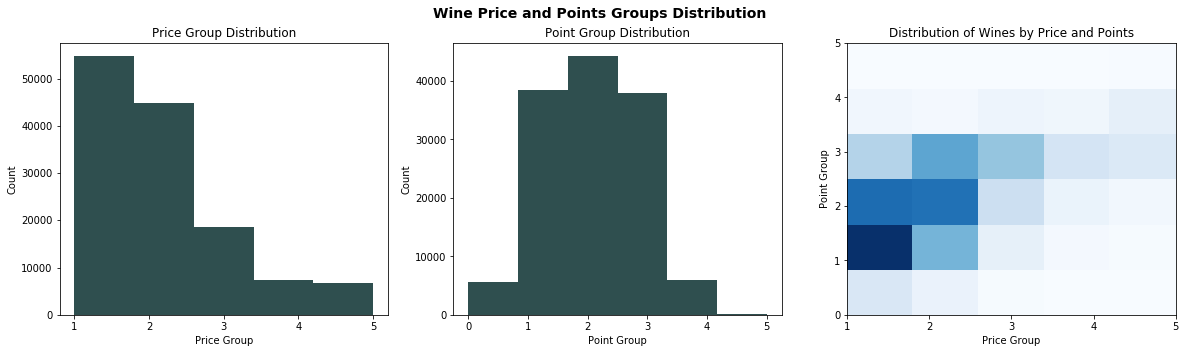

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[20, 5])
ax0, ax1, ax2= axes.flatten()
fig.suptitle('Wine Price and Points Groups Distribution', fontsize=14, fontweight='bold')
ax0.set_xticks([1,2,3,4,5])
ax1.set_xticks([0,1,2,3,4,5])
ax2.set_xticks([1,2,3,4,5])
ax0.hist(wine['Price_Group'], bins=5, color='darkslategrey')
ax0.set_title('Price Group Distribution')
ax1.hist(wine['Point_Group'], bins=6, color='darkslategrey')
ax1.set_title('Point Group Distribution')
ax2.hist2d(wine['Price_Group'], wine['Point_Group'], bins=[5,6], cmap='Blues')
ax2.set_title('Distribution of Wines by Price and Points')
ax0.set_ylabel('Count')
ax0.set_xlabel('Price Group')
ax1.set_xlabel('Point Group')
ax1.set_ylabel('Count')
ax2.set_xlabel('Price Group')
ax2.set_ylabel('Point Group')
plt.savefig('price_point_group_distributions.png')
plt.show()

### C. Distribution of Wine Description Length

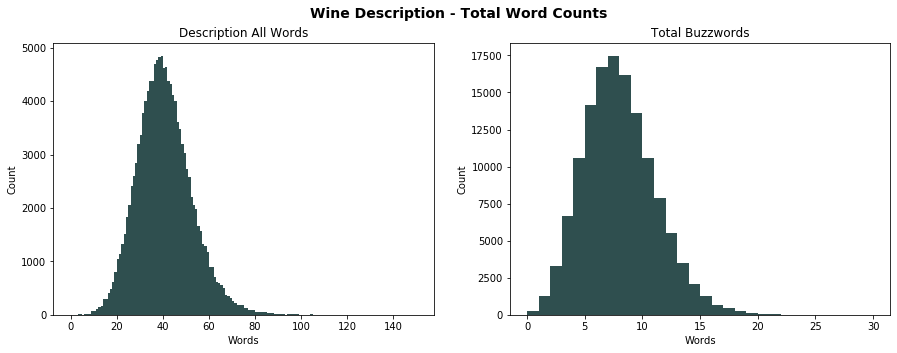

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])
ax0, ax1= axes.flatten()
fig.suptitle('Wine Description - Total Word Counts', fontsize=14, fontweight='bold')

ax0.hist(wine['Total_Word_Count'], bins=150, range=[0,150], color='darkslategrey')
ax0.set_title('Description All Words')
ax0.set_xlabel('Words')
ax0.set_ylabel('Count')
ax1.hist(wine['Total_Buzz_Words'], bins=30, range=[0,30], color='darkslategrey')
ax1.set_title('Total Buzzwords')
ax1.set_xlabel('Words')
ax1.set_ylabel('Count')

plt.savefig('dist_total_word_count.png')
plt.show()

### D. Distribution of Wine Description Usage of Buzz Words

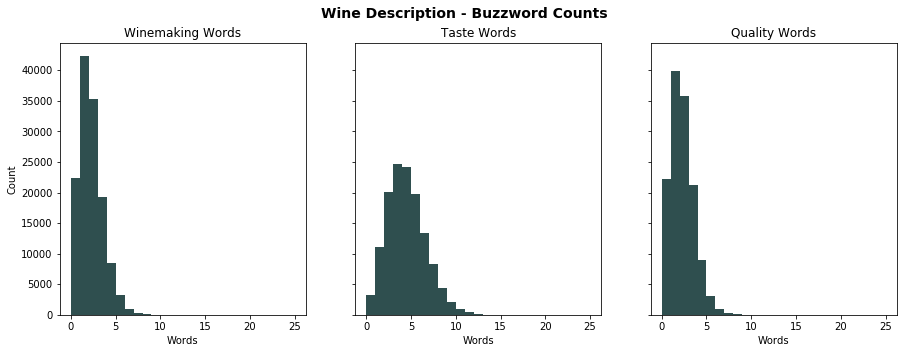

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=[15, 5])
ax0, ax1, ax2= axes.flatten()
fig.suptitle('Wine Description - Buzzword Counts', fontsize=14, fontweight='bold')

ax0.hist(wine['Winemaking_Word_Count'], bins=25, range=[0,25], color='darkslategrey')
ax0.set_title('Winemaking Words')
ax0.set_xlabel('Words')
ax1.set_xlabel('Words')
ax2.set_xlabel('Words')
ax0.set_ylabel('Count')
ax1.hist(wine['Taste_Word_Count'], bins=25, range=[0,25], color='darkslategrey')
ax1.set_title('Taste Words')
ax2.hist(wine['Excellence_Word_Count'], bins=25, range=[0,25], color='darkslategrey')
ax2.set_title('Quality Words')
plt.savefig('dist_buzz_word_count.png')
plt.show()

### E. Descriptive Statistics Summary Table

In [58]:
print("All wines - descriptive statistics")
print(wine[['price', 'points', 'Total_Word_Count', 'Total_Buzz_Words', 'Winemaking_Word_Count', 'Taste_Word_Count', 'Excellence_Word_Count']].describe())



All wines - descriptive statistics
               price         points  Total_Word_Count  Total_Buzz_Words  \
count  120341.000000  132468.000000     132468.000000     132468.000000   
mean       34.091773      87.963153         40.222756          7.500060   
std        37.428851       3.261568         11.858787          3.110838   
min         4.000000      80.000000          3.000000          0.000000   
25%        16.000000      86.000000         32.000000          5.000000   
50%        25.000000      88.000000         39.000000          7.000000   
75%        40.000000      90.000000         47.000000          9.000000   
max      2300.000000     100.000000        135.000000         26.000000   

       Winemaking_Word_Count  Taste_Word_Count  Excellence_Word_Count  
count          132468.000000      132468.00000          132468.000000  
mean                1.733354           3.99501               1.771696  
std                 1.320077           2.12461               1.321103  
m

### F. Calculate Variable Quartiles

In [59]:
#find quantiles
Q1 = wine.quantile(q=0.25)
Q3 = wine.quantile(q=0.75)

#interquartile range
IQR = Q3 - Q1
print("All wines")
print(IQR)


All wines
points                    4.0
price                    24.0
Winemaking_Word_Count     1.0
Excellence_Word_Count     2.0
Taste_Word_Count          3.0
Total_Buzz_Words          4.0
Total_Word_Count         15.0
Price_Group               1.0
Point_Group               2.0
dtype: float64


### G. Outlier Identification by IQR

In [60]:
index = wine.index
dataset_total = len(index)
dataset_count = wine.count()

#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we have not removed any outliers from the dataset, we have " + str(dataset_total) + " entries") 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_df = wine[wine < lower_bound]
lower_count = lower_df.count()

upper_df = wine[wine >upper_bound]
upper_count = upper_df.count()

outliers = lower_count + upper_count  
outliers_sum = outliers.sum()

outliers_to_dataset = outliers_sum / dataset_total
proportion_by_column = outliers / dataset_count

print ("When we have not removed any outliers from the dataset, we have " + str(dataset_total) + " entries")
print(" ")
print("Number of outliers is " + str(outliers.sum()) + " entries, listed below are outliers by column")
print(outliers)
print(" ")
print ("The proportion of total outliers which exist when compared to the total dataframe are: ")
print((outliers_to_dataset))
print(" ")
print("Below are the proportions of outliers that exist compared to the dataframe by column: ")
print(proportion_by_column)

When we have not removed any outliers from the dataset, we have 132468 entries
When we have not removed any outliers from the dataset, we have 132468 entries
 
Number of outliers is 40583 entries, listed below are outliers by column
country                      0
description                  0
designation                  0
points                     530
price                     7064
province                     0
region_1                     0
region_2                     0
variety                      0
winery                       0
split_description            0
Winemaking_Word_Count    13067
Excellence_Word_Count      297
Taste_Word_Count          1653
Total_Buzz_Words          1528
Total_Word_Count          2165
Price_Group              14279
Price_Group_Name             0
Point_Group                  0
Point_Group_Name             0
dtype: int64
 
The proportion of total outliers which exist when compared to the total dataframe are: 
0.30636078147175166
 
Below are the proporti

### H. Outlier Removal

In [61]:
wine_out = wine[~((wine < (Q1 - 1.5 * IQR)) | (wine > (Q3 + 1.5 * IQR)))]

wine_out = wine_out.dropna()

print("Outliers Removed - All Wine Summary")
print(wine_out.describe())


Outliers Removed - All Wine Summary
             points         price  Winemaking_Word_Count  \
count  27976.000000  27976.000000           27976.000000   
mean      87.728124     30.360345               1.433479   
std        3.203071     12.562481               0.970194   
min       80.000000      4.000000               0.000000   
25%       85.000000     20.000000               1.000000   
50%       88.000000     30.000000               1.000000   
75%       90.000000     40.000000               2.000000   
max       96.000000     59.000000               3.000000   

       Excellence_Word_Count  Taste_Word_Count  Total_Buzz_Words  \
count           27976.000000      27976.000000      27976.000000   
mean                1.523770          3.524485          6.481734   
std                 1.252903          1.925579          2.741093   
min                 0.000000          0.000000          0.000000   
25%                 1.000000          2.000000          5.000000   
50%            

### I. Inferential Statistics - Pearson Coefficient Matrix


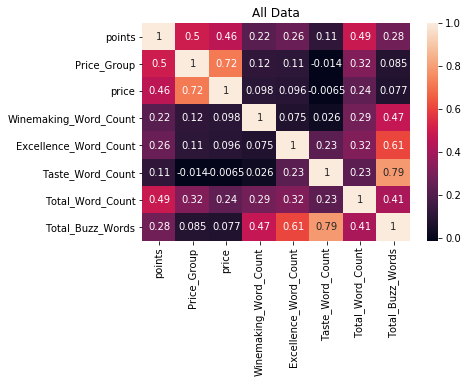

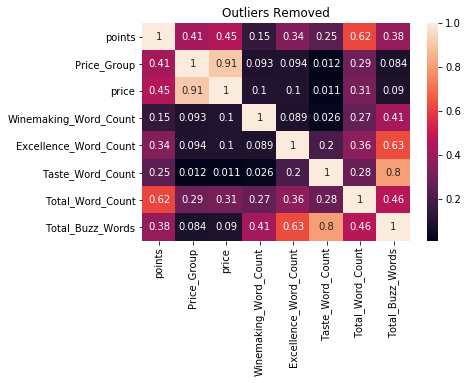

In [62]:
corr_filter = ['points', 'Price_Group', 'price', 'Winemaking_Word_Count', 'Excellence_Word_Count', 'Taste_Word_Count', 'Total_Word_Count', 'Total_Buzz_Words']

corr = wine[corr_filter].corr()

ax1 = sns.heatmap(corr, annot=True, annot_kws={'size':10})
plt.title("All Data")
plt.savefig('correlation_matrix_all.png')
plt.show()

corr = wine_out[corr_filter].corr()
ax1 = sns.heatmap(corr, annot=True, annot_kws={'size':10})
plt.title("Outliers Removed")
plt.savefig('correlation_matrix_outliers.png')
plt.show()

### J. OLS Regression to Predict Wine Points Value
####  Build models

In [63]:
wine_two = wine

dependentVar = wine_two['points']

filt = ['Point_Group', 'points', 'price', 'Price_Group', 'Winemaking_Word_Count', 'Excellence_Word_Count', 'Taste_Word_Count', 'Total_Word_Count', 'Total_Buzz_Words']

wine_two = wine_two[filt]

from statsmodels.formula.api import ols

model_fit = ols(formula = "points ~ price + Price_Group + Total_Word_Count + Total_Buzz_Words + Taste_Word_Count + Excellence_Word_Count + Winemaking_Word_Count", data = wine_two).fit()
print("ALL WINE - PARAMETERS")
print("================================")
print(model_fit.params)
print(" ")
print("ALL WINE - MODEL SUMMARY")
print("================================")
print(model_fit.summary())

ALL WINE - PARAMETERS
Intercept                80.652159
price                     0.006302
Price_Group               1.195634
Total_Word_Count          0.088419
Total_Buzz_Words          0.108508
Taste_Word_Count         -0.054705
Excellence_Word_Count     0.163204
Winemaking_Word_Count     0.000008
dtype: float64
 
ALL WINE - MODEL SUMMARY
                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                 1.906e+04
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:05:23   Log-Likelihood:            -2.7269e+05
No. Observations:              120341   AIC:                         5.454e+05
Df Residuals:                  120334   BIC:                         5.455e+05
Df Model:               

In [64]:
wineout_two = wine_out

dependentVar = wineout_two['points']

filt = ['Point_Group', 'points', 'price', 'Price_Group', 'Winemaking_Word_Count', 'Excellence_Word_Count', 'Taste_Word_Count', 'Total_Word_Count', 'Total_Buzz_Words']

wineout_two = wineout_two[filt]

from statsmodels.formula.api import ols

model_fit_out = ols(formula = "points ~ Price_Group + price + Total_Word_Count + Total_Buzz_Words + Taste_Word_Count + Excellence_Word_Count + Winemaking_Word_Count", data = wineout_two).fit()
print("OUTLIERS REMOVED - PARAMETERS")
print("================================")
print(model_fit_out.params)
print(" ")
print("OUTLIERS REMOVED - MODEL SUMMARY")
print("================================")
print(model_fit_out.summary())

OUTLIERS REMOVED - PARAMETERS
Intercept                79.547519
Price_Group               0.008793
price                     0.073988
Total_Word_Count          0.129637
Total_Buzz_Words          0.099944
Taste_Word_Count          0.045026
Excellence_Word_Count     0.216545
Winemaking_Word_Count    -0.161627
dtype: float64
 
OUTLIERS REMOVED - MODEL SUMMARY
                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     4309.
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:05:28   Log-Likelihood:                -63106.
No. Observations:               27976   AIC:                         1.262e+05
Df Residuals:                   27969   BIC:                         1.263e+05
Df Model

### All data provides a higher correlation value for the regression (0.487), whereas when outliers are removed the correlation is only 0.480. So we will use the model generated with all the data.

#### 2. Add points prediction to dataframe
Selected regression for all wines

In [65]:
wine['Predicted_Points'] = model_fit.predict(wine)
wine['Prediction_Accurracy'] = wine['Predicted_Points'] - wine['points']

print(wine.head())

  country                                        description  \
0      US  this tremendous 100% varietal wine hails from ...   
2      US  mac watson honors the memory of a wine once ma...   
3      US  this spent 20 months in 30% new french oak, an...   
8      US  this re-named vineyard was formerly bottled as...   
9      US  the producer sources from two blocks of the vi...   

                     designation  points  price    province  \
0              Martha's Vineyard      96  235.0  California   
2  Special Selected Late Harvest      96   90.0  California   
3                        Reserve      96   65.0      Oregon   
8                         Silice      95   65.0      Oregon   
9           Gap's Crown Vineyard      95   60.0  California   

             region_1           region_2             variety     winery  ...  \
0         Napa Valley               Napa  Cabernet Sauvignon      Heitz  ...   
2      Knights Valley             Sonoma     Sauvignon Blanc   Macauley  ...

#### 3. Compare actual points vs predicted points

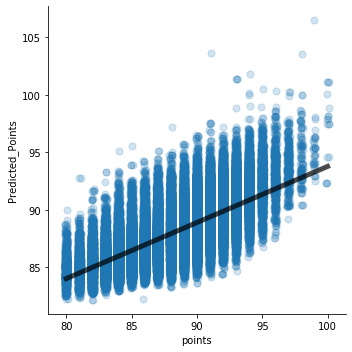

In [70]:
sns.lmplot(x='points', y='Predicted_Points', data=wine, x_jitter=.1, scatter_kws={"s":50,'alpha':.2}, line_kws={"color":"black","alpha":0.7,"lw":5})
plt.savefig('regression_scatterplot_points.png')

#### 4. How good is our predictive model?
r squared value = 0.487

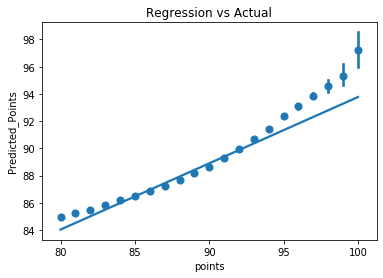

In [71]:
sns.regplot(x='points',y='Predicted_Points',data=wine, fit_reg=True, x_estimator=np.mean).set_title('Regression vs Actual')

plt.savefig('regression_plot_predict_vs_actual_points.png')

### K. Word Clouds

In [72]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\mmf06\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.1.1             |     pyh9f0ad1d_0          25 KB  conda-forge
    conda-4.8.4                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  archspec           conda-forge/noarch::archspec-0.1.1-pyh9f0ad1d_0

The following packages will be UPDATED:

  conda                                4.8.3-py37hc8dfbb8_1 --> 4.8.4-py37hc8dfbb8_1




conda-4.8.4          | 3.1 MB    |            |   0% 
conda-4.8.4          | 3.1 MB    |            |   1% 
conda-4.8.4          | 3.1 MB    | ###        |  31% 
conda-

In [73]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Words to exclude from word cloud
stopwords = set(STOPWORDS)
stopwords.update(["the", "of", "will", "was", "this", "and", "that", "is", "now", "flavor", "flavors"])

In [74]:
wine_mask = np.array(Image.open(r'C:\Users\mmf06\OneDrive\Springboard - Data Analytics\Capstone 2 - TBD/wine glass mask.png'))

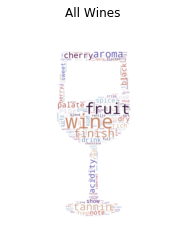

In [75]:
text = " ".join(review for review in wine.description)
wcloud = WordCloud(stopwords=stopwords, collocations=False, background_color='white', mask=wine_mask, colormap='twilight').generate(text)
plt.imshow(wcloud, interpolation='bilinear')
plt.title("All Wines")
plt.axis("off")
plt.savefig('wordcloud_update.png')
plt.show()

### Export edited dataframe to CSV file

In [76]:
#print(wine.head())

In [77]:
#Export to CSV file for visualization in tableau
wine.to_csv(r'C:\Users\mmf06\OneDrive\Springboard - Data Analytics\Capstone 2 - TBD\Wine_Not_Dataframe.csv')

## III. INSIGHTS
Key insights summary

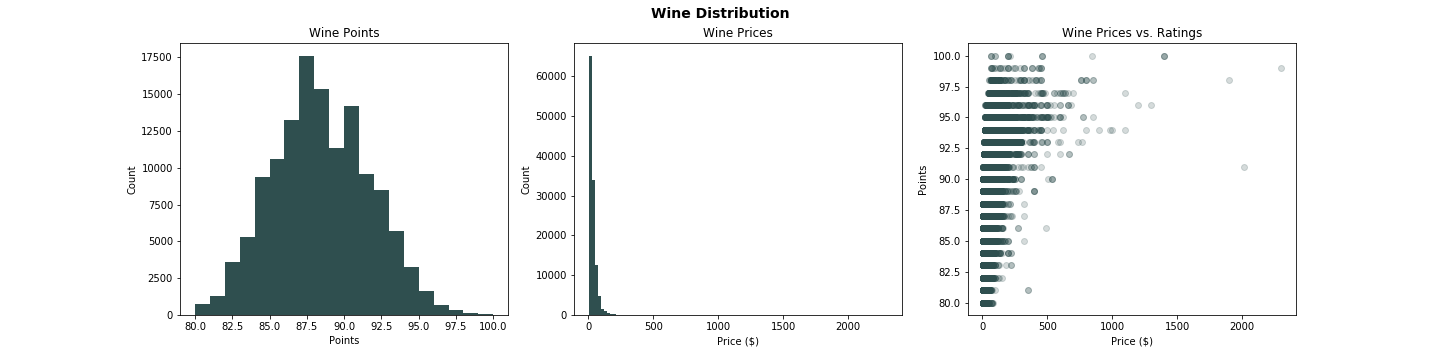

In [78]:
from IPython.display import Image
Image(filename='price_point_distributions.png') 

### 1. Descriptive statistical analysis of Wine Prices and Ratings
* The average cost of a bottle of wine is $34.09      
* The average rating of a bottle of wine is approximately 88 points (87.963153)

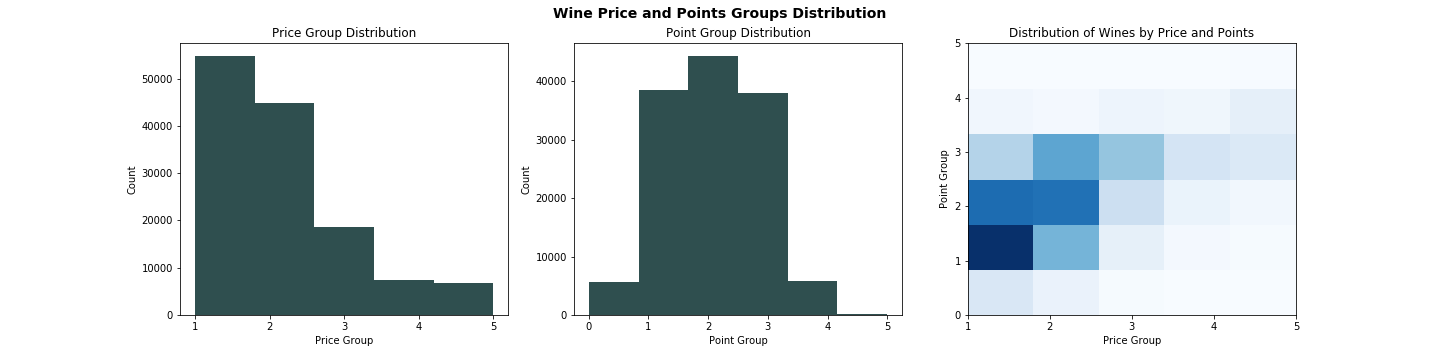

In [79]:
Image(filename='price_point_group_distributions.png') 

### 2. Comparision of wine price and rating using categorical groups
* Wine rating scale bins the points into groups.
* Compared prices by binning in $20 increments
* Binning helps illustrate that there may be correlation between price and point groups, but it is not a 1:1 match, there are other factors involved.

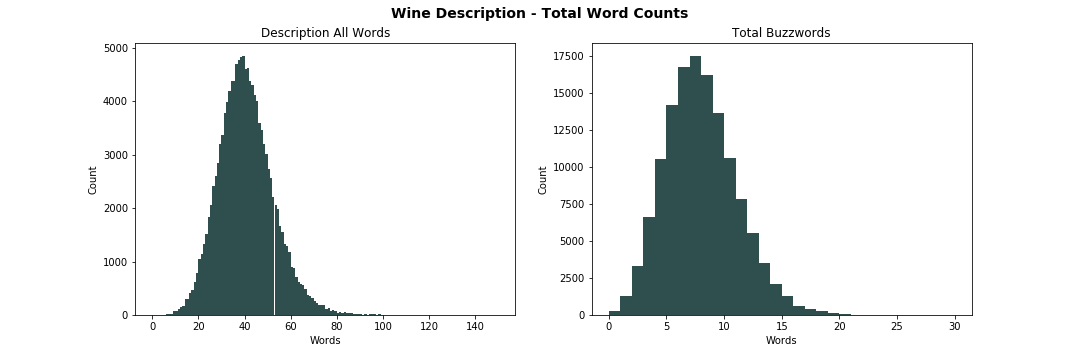

In [80]:
Image(filename='dist_total_word_count.png') 

### 3. Wine descriptions that are posted on websites selling wines may provide insight into the rating of a wine, if no rating was provided.
* The left panel shows the distribution of wines by the description length (or word count) used in over 130K wines.
* The average description length is approximately 40 words (40.222756).
* The right panel show the distribution of wines by the total number of buzzwords used in over 130K wines.
* The average number of buzzwords used is approximately 8 words (7.500060), which would be 20% of total description.

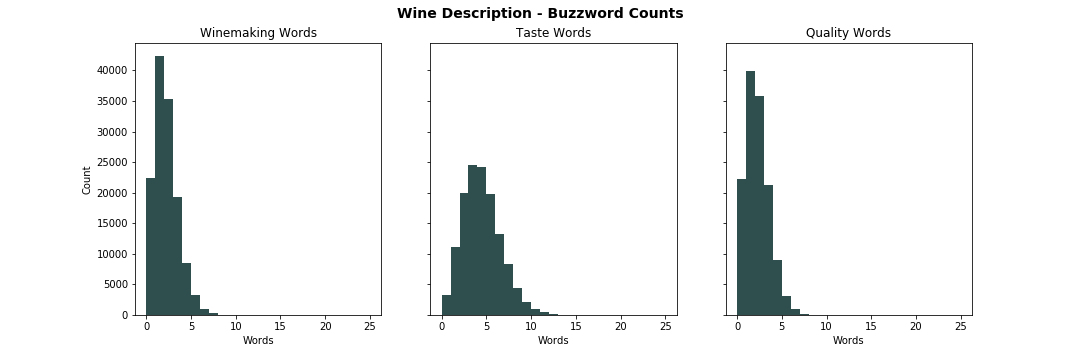

In [81]:
Image(filename='dist_buzz_word_count.png') 

### 4. Breakdown of the buzzwords into groups that describe the winemaking process, tasting notes, and the quality of the wine.  
Wine descriptions, on average, contain 2 winemaking words, 3 taste words, and 2 quality words.
* 1.733354 avg winemaking words
* 3.99501 avg taste words
* 1.771696 avg quality words






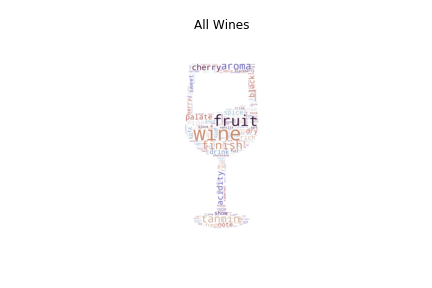

In [82]:
Image(filename='wordcloud_update.png')

### 5. Wordcloud was used to illustrate the words most commonly used in wine descriptions.

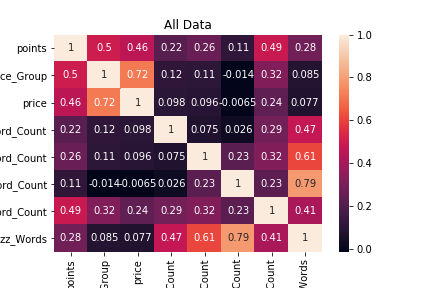

In [83]:
Image(filename='correlation_matrix_all.png') 

### 6. Inferential statistical analysis of wine rating KPIs
* Pearson correlation matrix was used to illustrate the relationship between wine ratings (points) with 7 KPIs.
* Comparision of all data and outlier-removed data did not show significant differences, in fact marginally higher correlations (based on r-squared values - annontated in matrix) were higher when all data was used.
* This informations can be used to generate at multivariate linear regression model which can predict wine ratings.

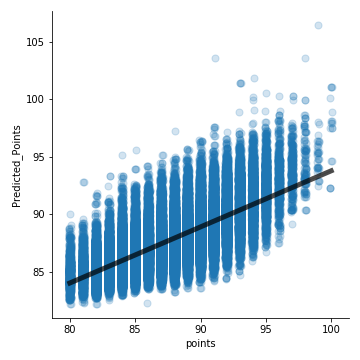

In [85]:
Image(filename='regression_scatterplot_points.png')

### 7.  Predicted rating of wines compared to their actual rating illustrates accuracy of the multivarite linear regression model built 

* Line illustrates accuracy of the linear regression the relationship of predicted points and the actual point. (r-squared value of 0.487)

* the points represent averages and variations (error bars) for each point.